In this blog post I will take a look at how the discretization of space means that
for short wavelengths the dispersion relation $E \propto p^2$ does no longer hold for a free particle.
And for $E_{\max}$ the travelling waves in the discrete system become
*standing waves*. 

Additonally we will construct an alternative discrete momentum
operator, that approximates the continuous operator for a larger range
of wavelenghts.

### Bounded space

The free particle in a periodic space of lenght $L$ can only have
discrete eigenvalues for the momentum due to the requirement $\psi(x + L) = \psi(x)$. 
We have the eigenfunctions:

$$
\psi_n(x) = a \, e^{i k_n x}, \quad k_n = 2 \pi n / L, \quad n \in \mathbb{Z}
$$

### Discrete space

If we discretize the $L$ length into $N$ points, with $x_j = j \Delta x$ and $\Delta x = L/N$ 
and $j= 0, 1, \dots N-1$, 
we consider $\psi(x)$ only at these discrete spatial points: $\psi(j \Delta x)$.
Because of that we find that the discrete momentum eigenfunction
$\psi_n$  cannot be distinguished from other eigenfunctions for $\psi_{n + m N}$ with $m \in \mathbb{Z}$:

$$
\psi_{n+mN}(j \Delta x) = a \, e^{i k_{n + mN} j \Delta x}
= a \, e^{i \frac{2 \pi (n + m N)}{N \Delta x}j \Delta x}
= a \, e^{i 2 \pi m j} e^{i 2 \pi n \frac{j \Delta x}{N \Delta x}} = a e^{i k_n j \Delta x}
= \psi_n(j \Delta x) \, .
$$

The Hamiltonian for the discretized free particle system is now a matrix $\textbf{H}$:

$$
\textbf{H} = -\frac{\hbar^2}{2m} \textbf{D2}
$$

where $\textbf{D2}$ is a discrete version of the second derivative $\frac{\partial^2}{{\partial x}^2}$.
The $n$-th momentum eigenfunction shall be denoted by $\boldsymbol{\psi_n}$. The bold greek symbol
stands for an $N$-dimensional tuple, that is compatible in the sense of matrix multiplication with the
$N \times N$-dimensional matrix $\textbf{H}$.
As we have seen above, in the discrete spatial representation we have

$$
\boldsymbol{\psi_n} = \boldsymbol{\psi_{n + mN}}
$$

so, as these eigenfunctions are *identical* in the discrete representation, the Hamiltonian
has no other choice but to yield the same energy $E_n$ for all:

$$
\textbf{H} \boldsymbol{\psi_{n + mN}} = E_n  \boldsymbol{\psi_{n + mN}} 
\quad \forall m \in \mathbb{Z} \, .
$$

## Are the continuous eigenfunctions also eigenfunctions for the discrete Hamiltonian?

But are the discrete representations of the continuous eigenfunctions:

$$
\psi_n(x) = a e^{i k_n x}, \quad k_n = 2 \pi n / L, \quad n \in \mathbb{Z}
$$

really eigenvectors of the matrix Hamiltonian $\textbf{H}$? Let's check this... (you guessed it) in python!

First, import the usual ingredients:

In [1]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg as linalg
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [2]:
plt.rcParams['figure.dpi'] = 300
plt.style.use(['science', 'notebook', 'grid', 'vibrant'])
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Now define the discrete version of the eigenfunctions and parameters:

In [3]:
# The parameters
L = 1
N = 300
hbar = 1
mass = 1
dx = L / N

# The spatial domain
x = np.linspace(0, L, N, endpoint=False)   

# The second order difference operator in periodic boundary conditions
D2 = sparse.diags([1, -2, 1, 1, 1], [-1, 0, 1, N-1, -N+1], shape=(N, N)) / dx**2

# The Hamiltonian
H = - (hbar**2 / (2 * mass)) * D2

# A function to construct the n-th eigenvector of the momentum operator
def psi_n(n):
    """Returns ($E_n$, $k_n$, $\psi_n$)
    """
    k_n = 2 * np.pi * n / L
    x = np.linspace(0, L, N, endpoint=False)
    E_n = k_n**2 * hbar**2 / (2 * mass)
    psi = np.exp(1j * k_n * x)
    psi /= np.sqrt(psi.T.conj() @ psi * dx)
    return E_n, k_n, psi

I don't know a clever way of testing if a given vector $\boldsymbol{\psi}$ is an eigenvector
of $\textbf{H}$, so I will use `numpy`´s elementwise division of arrays 
```python
(H @ psi) / psi
```

where `D2 @ psi` is the matrix product in python. This is safe, because the eigenvectors 
$\boldsymbol{\psi_n}$ have no zero components. If $\boldsymbol{\psi_n}$ is really an eigenvalue of $\textbf{H}$
this should yield a constant vector with the value $E_n$. 

This test is executed in the following snippet:

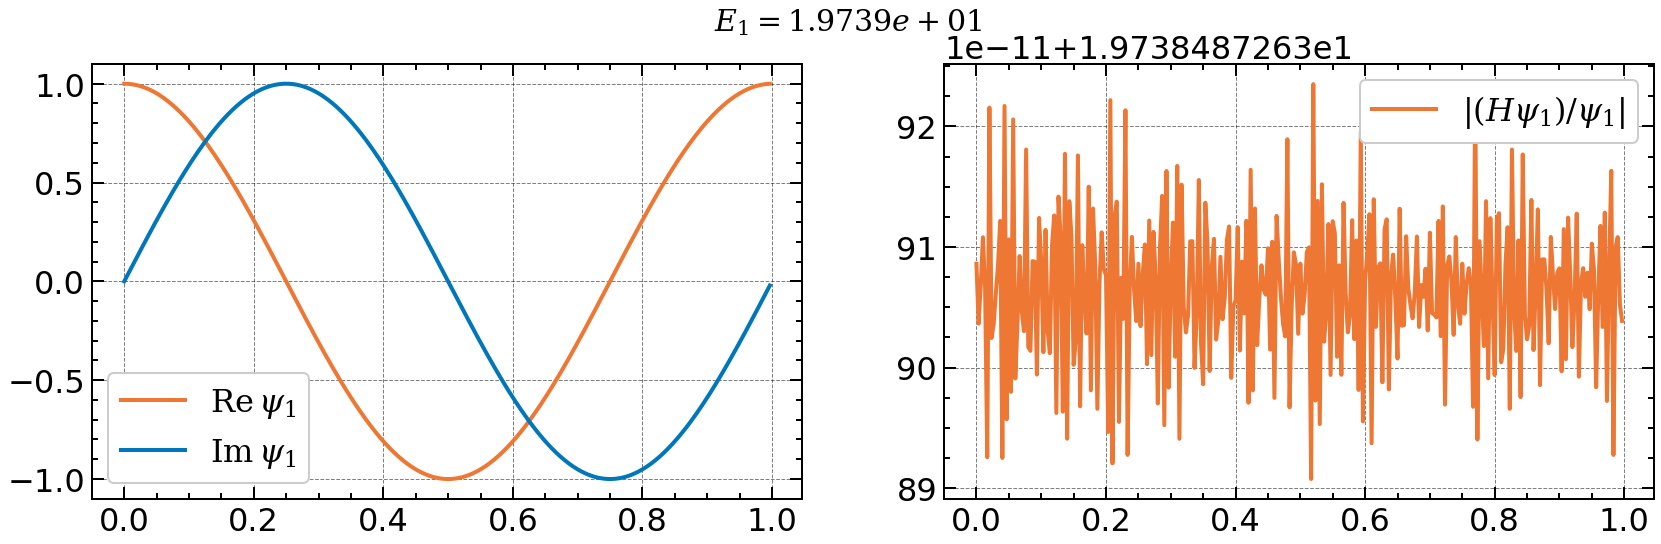

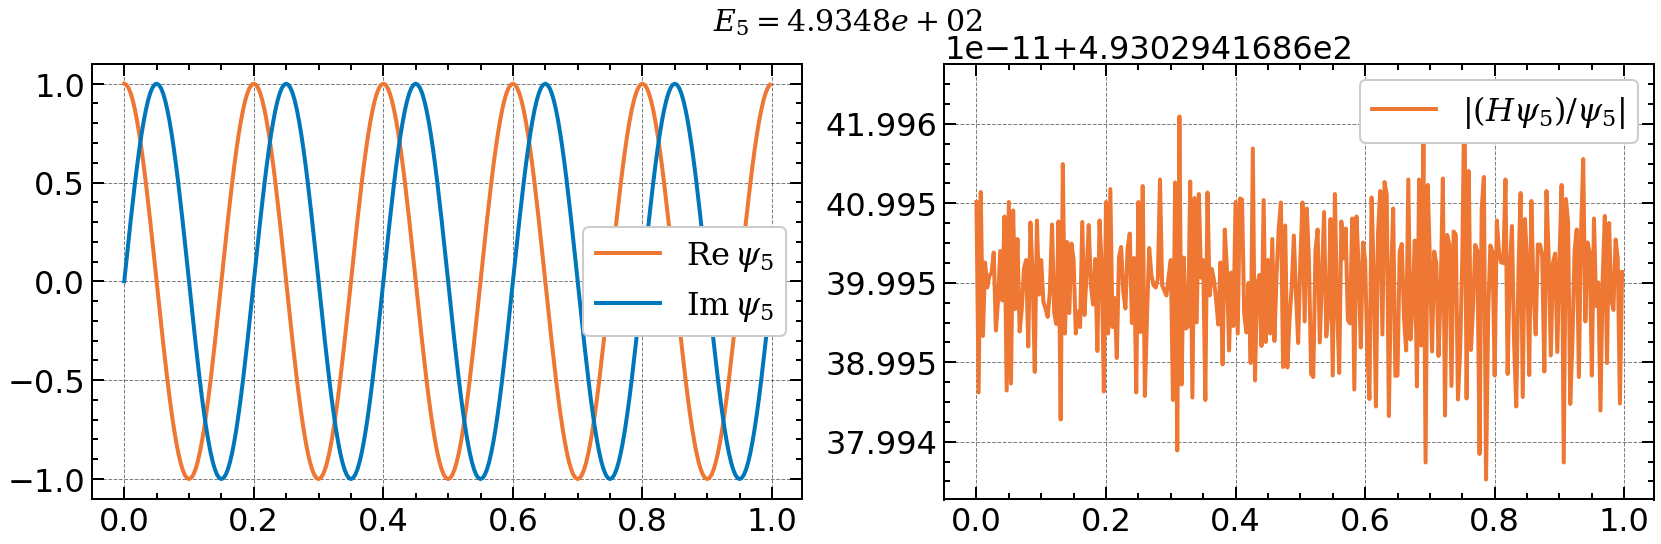

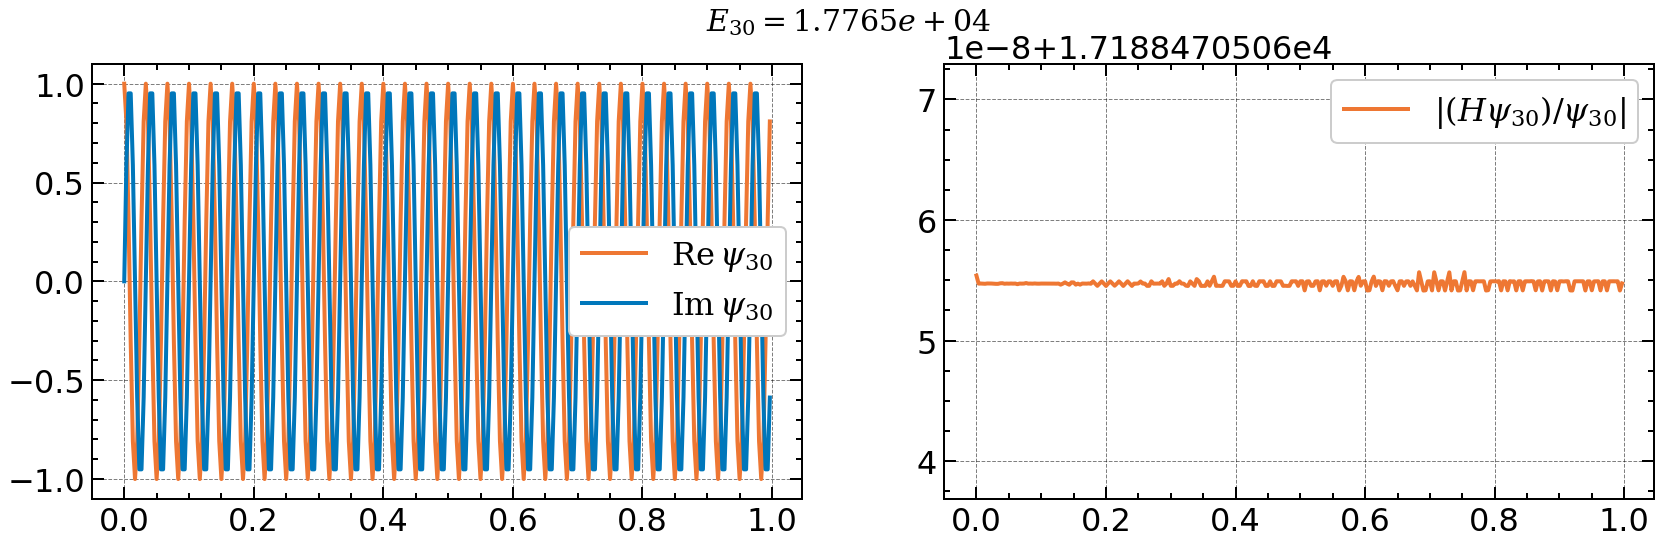

In [4]:
for n in (1, 5, N//10):
    E, _, psi = psi_n(n)

    plt.figure(figsize=(14,4))
    plt.suptitle("$E_{%d} = %.4e$" % (n, E), size=15)

    plt.subplot(1, 2, 1)
    plt.plot(x, psi.real, label=r"$\mathrm{Re} \, \psi_{%d}$" % n)
    plt.plot(x, psi.imag, label=r"$\mathrm{Im} \, \psi_{%d}$" % n)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x, np.abs((H @ psi) / psi), label="$|(H \psi_{%d}) / \psi_{%d}|$" % (n, n))
    plt.legend();

On the left side we have a plot of the discretized eigenfunctions (real and imaginary parts)
for $\boldsymbol{\psi_1}$ and $\boldsymbol{\psi_5}$. 

On the right side we plotted the vector $| (\textbf{H} \boldsymbol{\psi_n}) /\boldsymbol{\psi_n}|$.
This vector is nearly constant as one can see, because the fluctuations are of the
order of $10^{-11} / 19.7$ and smaller. So, as expected, the discretized eigenfunctions
of the continuous Hamilton operator are also eigenvectors of the discrete Hamilton
operator.

But if we compare the ratio $| (\textbf{H} \boldsymbol{\psi_n}) /\boldsymbol{\psi_n}|$ to the 
continuous eigenvalues $E_n$, which are printed above the graphs, one notices,
that the discretized eigenvalues are lower than the continuous energies and
this discrepancy gets bigger with larger $n$.

In the following graph we plot this value $| (\textbf{H} \boldsymbol{\psi_n}) /\boldsymbol{\psi_n}|$ for 
a whole range of $n$. (Of course this could be done, by just calculating the
eigenvalues of $\textbf{H}$ with `scipy.sparse.linalg.eigsh()`, but why not do 
it this time a bit differently?)

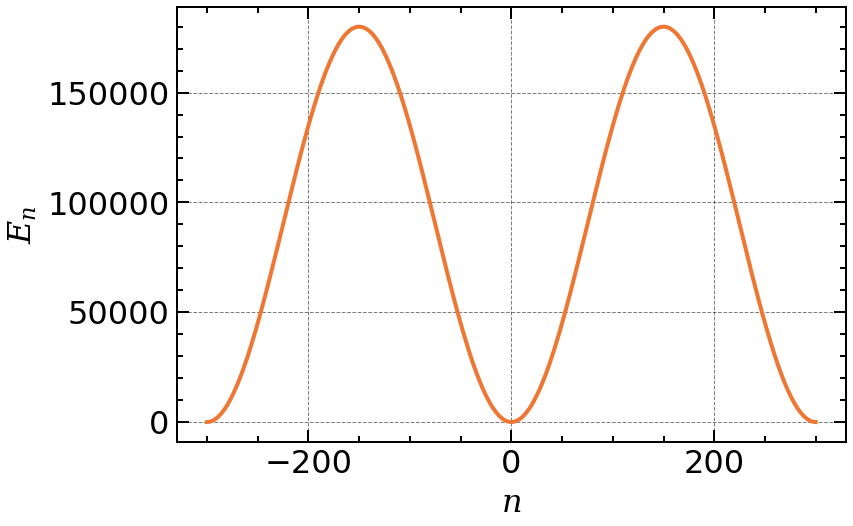

In [5]:
energies = []
n_2N = np.arange(-N, N+1)
for n in n_2N:
    _, _, psi = psi_n(n)
    E_n = np.average(np.abs((H @ psi) / psi))
    energies.append(E_n)
    
plt.plot(n_2N, energies)
plt.ylabel("$E_n$")
plt.xlabel("$n$");

Of course, this is something we have already seen in a former [blog post][discrete].
There we have seen, that the eigenvalues for the discretized problem follow

$$
E_n = \frac{2 N^2 \hbar^2}{mL^2} \sin^2 \left( \frac{n \pi}{N} \right)
$$

whereas the continuous eigenvalues are

$$
E_n = \frac{2 n^2 \pi^2 \hbar^2}{mL^2} \, .
$$

*Please note, that in the referenced blog post we have given both formulas for 
a particle in a box, where the eigenfunctions are standing waves. If this
box is discretized with resoltion $N$ this is equivalent to a right
moving and left moving wave in a periodic space of size $2N$. Because
of this the eigenfunctions here differ from the eigenfunctions last 
time by a factor of $2^2$*

[discrete]: https://znswanderer.github.io/physics/Discrete/

## A different look at the eigenvalues of the discrete Hamiltonian

We now want to take a more *heuristic* approach to the question why the eigenvalues of
the discrete Hamiltonian differ from the continuous versions. Starting
from the observation we made in the beginning, that in the discretized domain
the energy values are periodic with a period of $N$:

$$
\textbf{H} \boldsymbol{\psi_{n + mN}} = E_n  \boldsymbol{\psi_{n + mN}} 
\quad \forall m \in \mathbb{Z} \, .
$$

For the smallest energy values, $n \ll N$, the wavelengths are quite large and
the discretized system looks very much like a continuoum. Therefore we assume,
that in this regime the energy levels of the discretized system should approximate the 
values of the continuous system quite well.

On the other hand, the eigenvalues
must be periodic. In the next plot this situation is pictured:

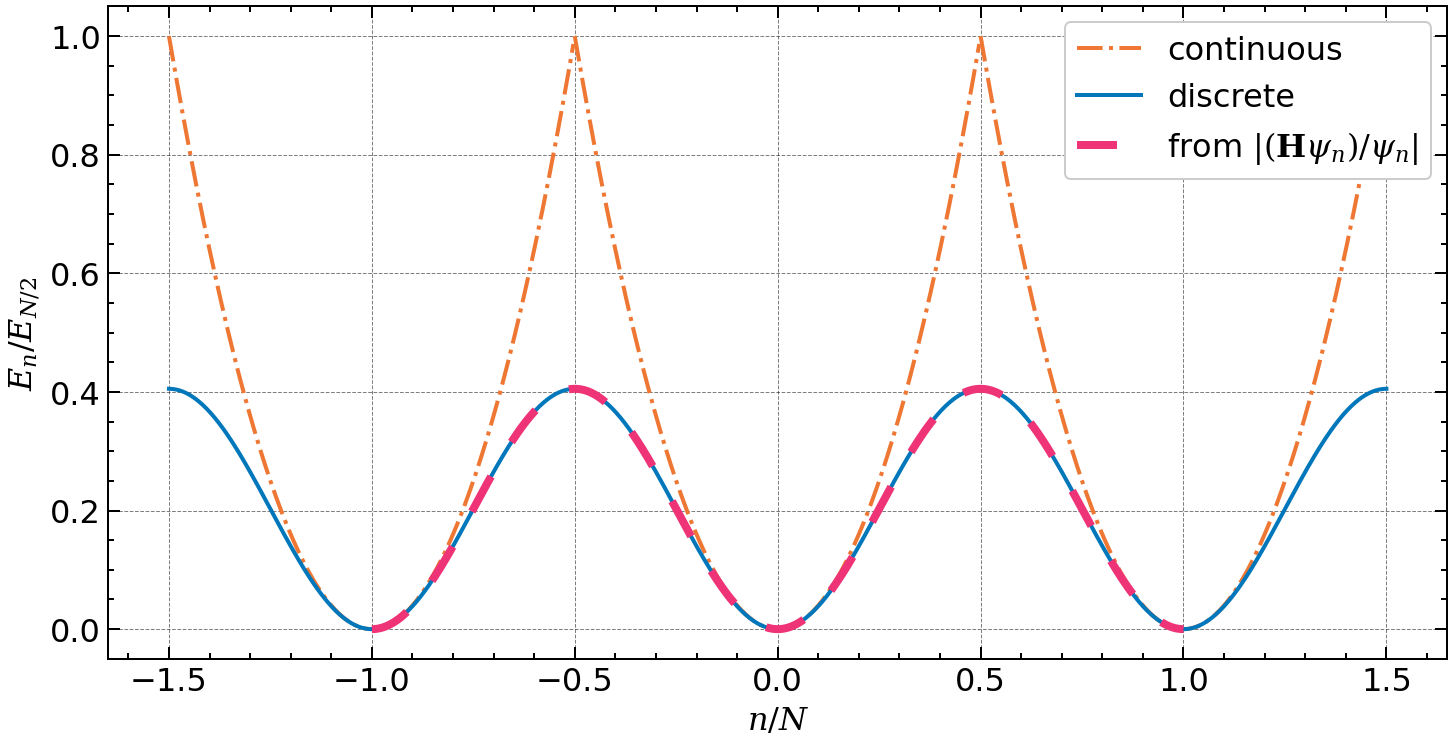

In [6]:
plt.figure(figsize=(12,6))

def E_n(n, n0):
    n = (n - n0)
    return (2 * n**2 * np.pi**2 * hbar**2) / (mass * L**2)

def E_n_disc(n):
    return (2*N**2 * hbar**2 / (mass * L**2)) * np.sin(n * np.pi / (N))**2

E_max = E_n(N/2, 0)

for m in range(-1, 2):
    n0 = m*N
    n_large = np.arange(n0 - N//2, n0 + N//2)  
    plt.plot(n_large/N, E_n(n_large, n0)/E_max, '-.', color='#EE7733', 
             label="continuous" if m == -1 else None)

n_all = np.arange(-1.5*N, 1.5*N + 1)
plt.plot(n_all/N, E_n_disc(n_all)/E_max, color='#0077BB', label='discrete')

plt.plot(n_2N/N, np.array(energies)/E_max, linestyle=(0, (5, 5)), linewidth=4, 
         label=r'from $|(\mathbf{H} \psi_n) /\psi_n|$', color='#EE3377')
    
plt.legend(loc='upper right')
plt.xlabel("$n/N$")
plt.ylabel("$E_n/ E_{N/2}$");

The dash-dotted curves are parabolas centered at the periodic points $n_0 = m N$, where the
parabola around $n_0 = 0$ follows the energy eigenvalues in the continuous system:

$$
E_n = \frac{2 n^2 \pi^2 \hbar^2}{mL^2} \, .
$$

Because of the discretization, however, the eigenvalues must be periodic:

$$
E_{n + mN} = E_n \, .
$$

This is taken account of, by repeating the parabolic pattern every $N$ steps in the graph. In 
principle the energy eigenvalues could follow the connected graph of the dash-dotted lines,
but this function is not very smooth, so the "real" discrete system keeps the overall
pattern around the points $n=mN$, but smoothes out the connection between the periods,
which leads to a $\sin^2 (n)$ behaviour as expected. The solid curve shows the results
from the $\sin^2$ formula above and the dashed curve repeats the results from the
$| (\textbf{H} \boldsymbol{\psi_n}) /\boldsymbol{\psi_n}|$ calculation.



### The discrete momentum eigenvalues

The need for "smoothing" becomes even more apparent, if we take a look at the 
momentum eigenvalues.

The energy eigenfunctions are:

$$
\psi_n(x) = a \, e^{i k_n x}, \quad k_n = 2 \pi n / L, \quad n \in \mathbb{Z}
$$

and the momentum operator is

$$
\hat p = -i \hbar \frac{\partial}{\partial x} \, .
$$

Of course for the free particle the energy eigenfunctions are eigenfunctions of
the momentum operator too, so with $\hat p \psi_n(x) = p_n \psi_n(x)$ we find:

$$
p_n = \hbar k_n =  2 \pi \hbar n / L, \quad n \in \mathbb{Z} \, .
$$

The energy eigenvalues were

$$
E_n = \frac{2 n^2 \pi^2 \hbar^2}{mL^2} \, .
$$

So in the continuous case we have the relation:

$$
p_n = \frac{mL}{h} \frac{\partial}{\partial n} E_n
$$


We can plot this now, again with respecting the periodicity in the discrete description:

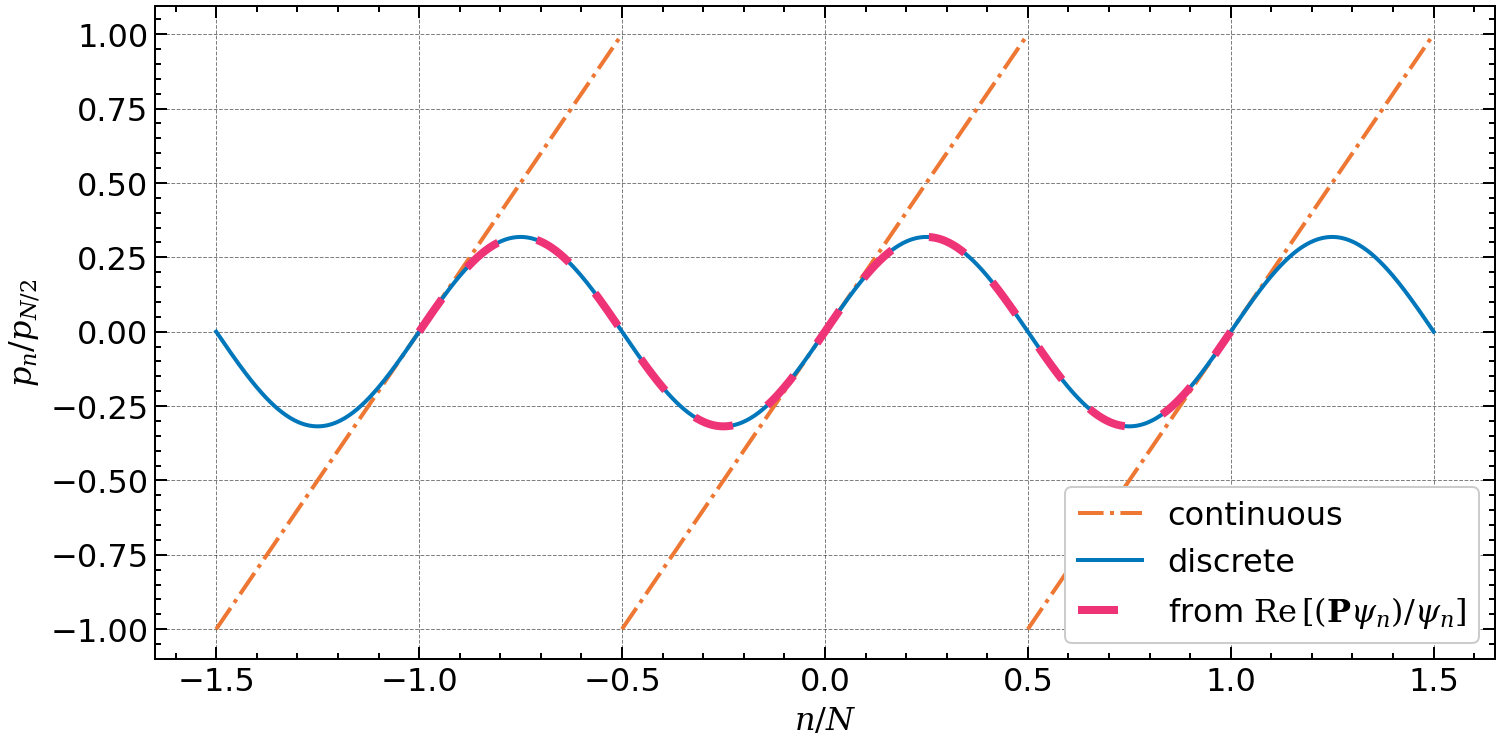

In [7]:
# The first order forward difference operator in periodic boundary conditions
D_f = sparse.diags([-1, 1, 1], [0, 1, -N+1], shape=(N, N)) / dx
P = - 1j * hbar * D_f

momenta = []
n_2N = np.arange(-N, N+1)
for n in n_2N:
    _, _, psi = psi_n(n)
    p_n = np.average(((P @ psi) / psi).real)
    momenta.append(p_n)
    
plt.figure(figsize=(12,6))

def p_n(n, n0):
    n = (n - n0)
    return (2 * np.pi * hbar * n) / L

def p_n_disc(n):
    return (hbar * N / L) * np.sin(2 * n * np.pi / N)

p_max = p_n(N/2, 0)

for m in range(-1, 2):
    n0 = m*N
    n_large = np.arange(n0 - N//2, n0 + N//2)  
    plt.plot(n_large/N, p_n(n_large, n0)/p_max, '-.', color='#EE7733', 
             label="continuous" if m == -1 else None)


n_all = np.arange(-1.5*N, 1.5*N + 1)
plt.plot(n_all/N, p_n_disc(n_all)/p_max, color='#0077BB', label='discrete')

plt.plot(n_2N/N, np.array(momenta)/p_max, color='#EE3377', linestyle=(0, (5, 5)), 
         linewidth=4, label=r'from $\mathrm{Re} \, [(\mathbf{P} \psi_n) /\psi_n]$')

plt.legend(loc='lower right')
plt.xlabel("$n/N$")
plt.ylabel("$p_n/p_{N/2}$");

The periods in the eigenvalues for $p_n = \hbar k_n =  2 \pi \hbar n / L$ now mean, that
there are [jump discontinuities][vanhalen] at $n = (m + \frac{1}{2})N$ (dash-dotted lines). Again for small wave lengths, $n \approx 0$, 
the momentum in the discrete system should resemble the continuous system and
for these small $n$-values the other curves match the lines of the continuous case.
But here, in order to reach the correct slope again at the next period, the 
curves of the discrete system must bend twice (have two inflection points), whereas 
in for the energy eigenvalues the curves only needed one inflection point. So the $n$-frequency
of the curve for the momentum is twice the frequency of the energy eigenvalue curve.

This can also be seen mathematically. Above we found for the continuous case the 
following realation:

$$
p_n = \frac{mL}{h} \frac{\partial}{\partial n} E_n
$$

The energy eigenvalues for the discrete system were:

$$
E_n = \frac{2 N^2 \hbar^2}{mL^2} \sin^2 \left( \frac{n \pi}{N} \right)
$$

so, using the relation we find:

$$
p_n = \frac{2 \hbar N}{L} \sin(n \pi /L) \cos(n \pi / L)
= \frac{\hbar N}{L} \sin(2 n \pi / L) \, ,
$$

which is plotted as the solid blue curve "discrete" in the graph above.

[vanhalen]: https://en.wikipedia.org/wiki/Classification_of_discontinuities#Jump_discontinuity

Looking at the point $n= (m + \frac{1}{2})N$ we find that here we have $p=0$, but the energy however
is at its maximum value $E = E_{\max}$! 
This is rather strange, because the system only has kinetic energy, but how can there be maximum
kinetic energy if the momentum is zero?

At this point, I don't want to get into too much detail here, but basically because of the 
discreteness of space, the travelling wave becomes a *standing wave* at  $n= (m + \frac{1}{2})N$ and
all "kinetic" energy is from the oscillating parts of the wave in place. It must be understood, that
here the fact that $p$ is zero at $E_{\max}$ is an *artifact of the discretization of space* and 
not a physical reality. The whole [dispersion relation][dispersion] deviates from the $E \propto p^2$ 
dispersion relation of the free particle in the discrete space. 
On the other hand such a dispersion relation is physical in real periodic systems, like 
crystals, where the quasi-particles named [phonons], quantized lattice oscillations, show
in part exactly these dispersion relations.

For further information
dive into topics like:

* [group velocity](https://en.wikipedia.org/wiki/Group_velocity) versus [phase velocity](https://en.wikipedia.org/wiki/Phase_velocity)
* [crystal momentum](https://en.wikipedia.org/wiki/Crystal_momentum)
* [Brillouin zone](https://en.wikipedia.org/wiki/Brillouin_zone)

[dispersion]: https://en.wikipedia.org/wiki/Dispersion_relation
[phonons]: https://en.wikipedia.org/wiki/Phonon

## Alternative momentum operator

At this point one can ask, if we could find other forms of the momentum operator for the
discrete system. We would like an operator, that has the correct eigenfunctions, but whose
eigenvalues would follow the continuous straight line for a larger range of $n$-values.
The only restriction we have is, that the eigenvalues must be periodic $p_n = p_{n+mN}$.

We are looking for momentum eigenvalues, that are kind of a "stretched" sinus function
along the straight lines of the continuous eigenvalues, which I tried to 
picture in the following graph:

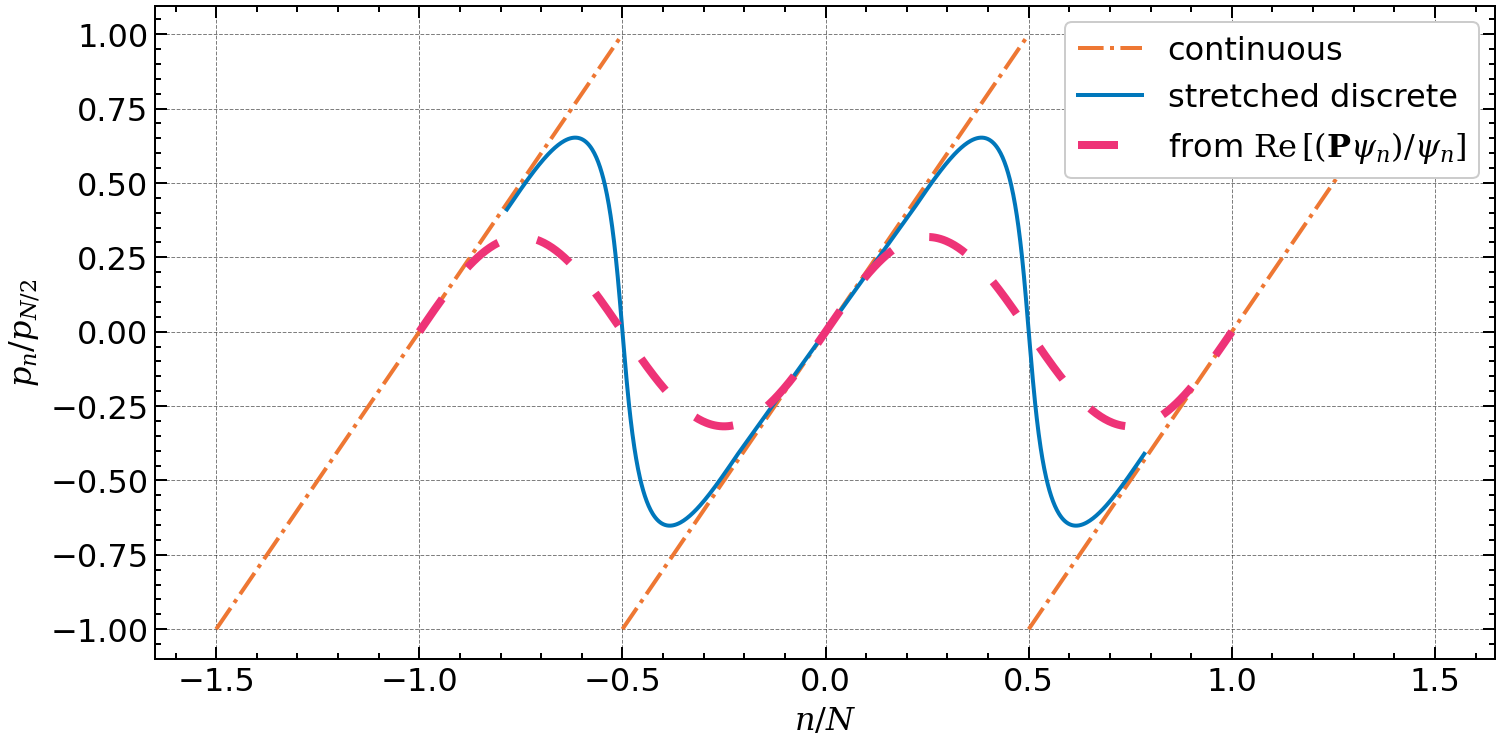

In [8]:
plt.figure(figsize=(12,6))

def p_n(n, n0):
    n = (n - n0)
    return (2 * np.pi * hbar * n) / L

def p_n_disc(n):
    return (hbar * N / L) * np.sin(2 * n * np.pi / N)

p_max = p_n(N/2, 0)

for m in range(-1, 2):
    n0 = m*N
    n_large = np.arange(n0 - N//2, n0 + N//2)  
    plt.plot(n_large/N, p_n(n_large, n0)/p_max, '-.', color='#EE7733', 
             label="continuous" if m == -1 else None)


n_all = np.arange(0, N + 1)
p = np.row_stack((n_all/N, p_n_disc(n_all)/p_max))

# We construct a "streched" version of the sin function in a clumsy way
# with rotating and stretching. There surely must be a better way, but
# I am in a kind of a hurry right now.
p[0] -= 0.5
theta = np.pi / 8
# Rotation matrix:
R = np.array(((np.cos(theta), -np.sin(theta)), (np.sin(theta), np.cos(theta))))
p_rot = R @ p
p_rot[1] -= p_rot[0]
p_rot[0] /= 1.1
p_rot = np.linalg.inv(R) @ p_rot
p_rot[0] += 0.5

p_rot[0] -= 1
p = np.copy(p_rot)
p[0] += 1
p = np.concatenate((p_rot, p), axis=1)

plt.plot(p[0], p[1], color='#0077BB', label='stretched discrete')

plt.plot(n_2N/N, np.array(momenta)/p_max, color='#EE3377', linestyle=(0, (5, 5)), 
         linewidth=4, label=r'from $\mathrm{Re} \, [(\mathbf{P} \psi_n) /\psi_n]$')

plt.legend(loc='upper right')
plt.xlabel("$n/N$")
plt.ylabel("$p_n/p_{N/2}$");

If this stretching is extended we finally would get eigenvalues, that follow the dashed-dotted
lines of the continuous system.

So, let's say we want to construct such a matrix $\mathbf{P_d}$, that has the
linear eigenvalues $p_n = \hbar k_n =  2 \pi \hbar n / L$ for the known discrete 
eigenfunctions $\mathbf{p_n}$. If we use the [bra-ket][dirac] notation, this momentum operator would look like:

$$
\hat P_d = \sum_{n} p_n \ket{p_n}  \bra{p_n} \, .
$$

If we take $\ket{x}$ as the discrete position eigenvectors, then we have $\mathbf{p_n} = \braket{x|p_n}$
and find for the matrix representation of $\hat P_d$ in position space:

$$
\mathbf{P_d} = \sum_n p_n \mathbf{p_n}\mathbf{p_n}^{\dagger}
$$

This can be written more compactly as:

$$
\mathbf{P_d} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}^{\dagger}
$$

where $\mathbf{Q}$ is a matrix, where the $n$-th column is the eigenvector $\mathbf{p_n}$ and 
$\boldsymbol{\Lambda}_{n,m} = p_n \delta_{n,m}$ is a diagonal matrix of the eigenvalues of $\mathbf{P_d}$.
This form is called [eigendecomposition of a matrix][eig_matrix].

With this we can now construct this matrix in python:


[dirac]: https://en.wikipedia.org/wiki/Bra%E2%80%93ket_notation
[eig_matrix]: https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

In [19]:
kns = []
pns = []
for n in range(-N//2, N//2):
    _, kn, pn = psi_n(n)
    kns.append(kn)
    pns.append(pn)
    
# Instead of Q we will construct Q_inv, that is Q^{-1}, because we
# can simply stack rows of eigenvectors
Q_inv = np.array([v.T.conj() for v in pns])
Q = Q_inv.T.conj()
Lambda = np.diag(kns)
# calculate P = Q \Lambda Q^{-1}
# we also must include the resolution dx in order to get correct scaling
Pd = Q @ Lambda @ Q_inv * dx   

# The Hamiltonian
Hd = (hbar**2 / (2 * mass)) * (Pd @ Pd)

The Hamiltonian constructed with this matrix will now show between $-N/2$ and $N/2$ the 
behaviour of the continuous system, but has as expected a periodic behaviour $E_n = E_{n+mN}$, 
which means non-smoothness at the period boundaries.

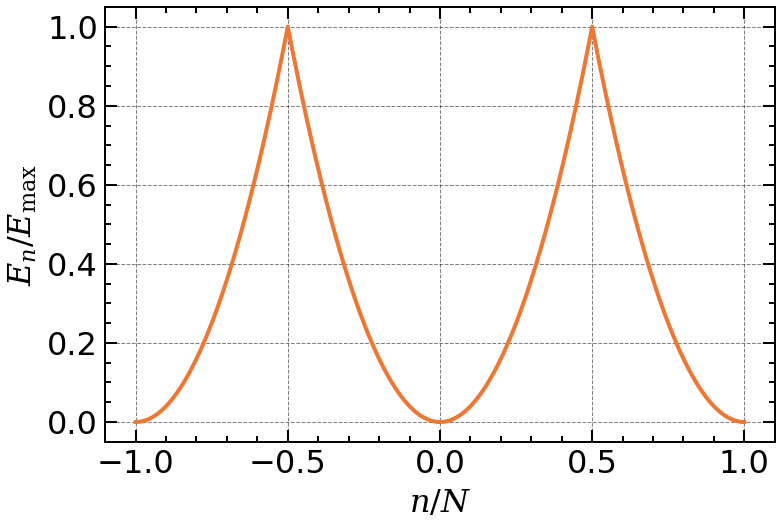

In [20]:
energies = []
n_2N = np.arange(-N, N+1)
for n in n_2N:
    _, _, psi = psi_n(n)
    E_n = np.average(((Hd @ psi) / psi).real)
    energies.append(E_n)
    
plt.plot(n_2N/N, np.array(energies)/E_max)
plt.ylabel("$E_n/E_{\max}$")
plt.xlabel("$n/N$");

So, this operator would be much better in approximating the continuous system. But there is
a drawback: this operator is no longer quasi diagonal in position space, which 
means we cannot use *sparse* matrices in python and dealing with this matrix is not very
efficient. 

A way to overcome this lies in the [split-step method][split], where we exchange 
the multiplication by the $\mathbf{Q}$ and $\mathbf{Q}^\dagger$ matrices
with a [Fast Fourier Transform][FFT]. 


[split]: https://en.wikipedia.org/wiki/Split-step_method
[FFT]: https://en.wikipedia.org/wiki/Fast_Fourier_transform